In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import barycentric_interpolate
from scipy.optimize import root
%matplotlib inline

# Problem 1

In [3]:
c = lambda x: -(7./10)*(x**2 - 1.)
alpha = lambda x: (1-c(x)**2)**(-.5)

def Lfunc(x,y,y_prime):
    L_ = alpha(x)*np.sqrt(1+(alpha(x)*y_prime(x))**2) - ((alpha(x)**2*c(x))*y_prime(x))
    return L_

def T(Lfunc,y,y_prime,step_size):
    X = np.linspace(-1,1,step_size)
#     val = []
    
#     for x in X:
#         val.append(Lfunc(x,y,y_prime))
#     return X,val
    val = quad(Lfunc,-1,1,args=(y,y_prime))
    return val

In [4]:
y = lambda x: 2.5*x + 2.5
print quad(y,-1,1)

(5.0, 5.551115123125783e-14)


# Problem 2

In [5]:
y = lambda x: 2.5*x + 2.5
y_prime = lambda x: 2.5
vals = T(Lfunc,y,y_prime,500)
print vals[0]

# plt.plot(X,vals)

3.87708204914


In [6]:

def cheb(N):
    
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1)) #Change this somehow
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1)) #I think this has to change too.
    D  = D - np.diag(np.sum(D.T,axis=0)) #I think this has to change.
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 3

In [50]:
c = lambda x:-.7*(x**2 - 1)
alpha = lambda x: np.sqrt(1-c(x))


def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    q = np.ones((N+1,1))
    q[0], q[-1] = 2., 2.
    q = q*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (q*(1./q).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

def prob3():
    N = 8
    D,X = cheb(N)
    print D
    print X
    grid = np.linspace(-1,1,100)
    f = lambda x: alpha(x)**3 * y_prime(x) * (1+(alpha(x)*y_prime(x))**2)**(-.5)
    F = f(X)
    D2 = np.dot(D, D)


    #This sets U[0] = U[N] = 0
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    F[0], F[-1] = 5, 0

    U = la.solve(D2,F)
    U_interpolated = barycentric_interpolate(X,U,grid)
    

    real_U = alpha(grid)

    #plt.plot(grid,real_U)
    plt.plot(grid,U_interpolated)
    plt.plot(grid,real_U)
    plt.plot()
    plt.show()
    return U_interpolated

[[ 21.5        -26.27414237   6.82842712  -3.23982881   2.          -1.44646269
    1.17157288  -1.03956613   0.5       ]
 [  6.56853559  -3.15432203  -4.61312593   1.84775907  -1.0823922
    0.76536686  -0.61312593   0.5411961   -0.25989153]
 [ -1.70710678   4.61312593  -0.70710678  -3.0823922    1.41421356
   -0.9176078    0.70710678  -0.61312593   0.29289322]
 [  0.8099572   -1.84775907   3.0823922   -0.22417076  -2.61312593
    1.30656296  -0.9176078    0.76536686  -0.36161567]
 [ -0.5          1.0823922   -1.41421356   2.61312593   0.          -2.61312593
    1.41421356  -1.0823922    0.5       ]
 [  0.36161567  -0.76536686   0.9176078   -1.30656296   2.61312593
    0.22417076  -3.0823922    1.84775907  -0.8099572 ]
 [ -0.29289322   0.61312593  -0.70710678   0.9176078   -1.41421356
    3.0823922    0.70710678  -4.61312593   1.70710678]
 [  0.25989153  -0.5411961    0.61312593  -0.76536686   1.0823922
   -1.84775907   4.61312593   3.15432203  -6.56853559]
 [ -0.5          1.0395661

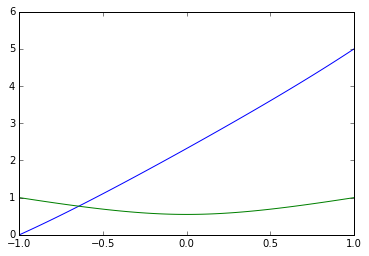

In [51]:
points = prob3()

# Problem 4

In [48]:
c = lambda x:-.7*(x**2 - 1)
def prob4():
    D,X = cheb(99)
    zeros = points
    dy = np.dot(D,zeros)
    print dy
    antiderivative = lambda theta: np.sec(theta(x))*np.tan(theta(x))
    
    vals = []
    for i in xrange(len(X)):
        vals.append(np.arcsin((c(X[i])*(1.-dy[i]))/(1+(dy[i]**2))))
    plt.plot(X,vals)
    plt.show()

[-113.35445688  -56.85192024  -16.12339821  -16.11315783   -9.33645836
   -9.32678579   -6.6246814    -6.61538714   -5.17481942   -5.16584536
   -4.275498     -4.26681102   -3.66511272   -3.65668774   -3.22520135
   -3.21701692   -2.89440351   -2.88644032   -2.63778808   -2.6300283
   -2.43402632   -2.42645324   -2.26937334   -2.26197119   -2.13458631
   -2.12734013   -2.02323414   -2.01612963   -1.93071751   -1.92374099
   -1.85367424   -1.84681254   -1.78960451   -1.78284494   -1.73662713
   -1.72995739   -1.69331685   -1.68672502   -1.65859355   -1.65206797
   -1.63164558   -1.62517488   -1.61187656   -1.60544957   -1.59886849
   -1.59247419   -1.5923569    -1.58598442   -1.59221527   -1.58585381
   -1.59844688   -1.59208569   -1.61118337   -1.6048117    -1.63068963
   -1.62429671   -1.65737544   -1.6509504    -1.69181476   -1.68534665
   -1.73477458   -1.72825229   -1.78725603   -1.78066824   -1.85055206
   -1.84388723   -1.92632851   -1.91957484   -2.01673859   -2.00988397
   -2.1

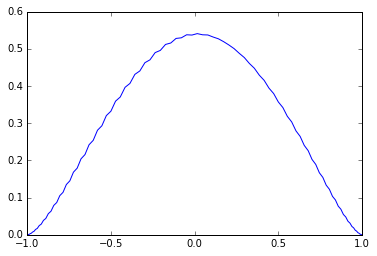

In [49]:
prob4()